Alejandro Toledo          39 Alvaro Uribe              35 Amelie Mauresmo           21 
Andre Agassi              36 Angelina Jolie            20 Ariel Sharon              77 
Arnold Schwarzenegger     42 Atal Bihari Vajpayee      24 Bill Clinton              29 
Carlos Menem              21 Colin Powell             236 David Beckham             31 
Donald Rumsfeld          121 George Robertson          22 George W Bush            530 
Gerhard Schroeder        109 Gloria Macapagal Arroyo   44 Gray Davis                26 
Guillermo Coria           30 Hamid Karzai              22 Hans Blix                 39 
Hugo Chavez               71 Igor Ivanov               20 Jack Straw                28 
Jacques Chirac            52 Jean Chretien             55 Jennifer Aniston          21 
Jennifer Capriati         42 Jennifer Lopez            21 Jeremy Greenstock         24 
Jiang Zemin               20 John Ashcroft             53 John Negroponte           31 
Jose Maria Aznar          23 Jua

/Users/harshpathak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:77: RuntimeWarning: invalid value encountered in sqrt


100D KNN Accuracy score after whitening 0.32170542635658916


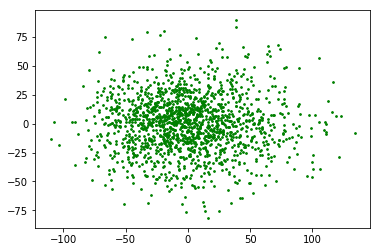

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import math
import operator
from numpy import linalg as LA


def plotgraph(finalModel):
    plt.scatter(finalModel[:,0], finalModel[:,1],c="green", s=3, )
    plt.show()

def eigenV(data,cov,k):
    pm=[]
    w, v = LA.eig(cov)
    idx = w.argsort()[::-1]
    w = w[idx]
    v = v[:, idx]
    for i in range(k):
        pm.append(v[:,i])
    usethis=np.array(pm)
    
    return(usethis.transpose(),w)




def covar(X):
    xt=X.transpose()
    xtx=np.dot(xt,X)
    N=len(X)
    xtx=xtx/(N-1)
    return(xtx)
def standardise(X):
    mean= np.mean(X, axis=0)
    std = np.std(X, axis=0, ddof=1)
    trainxStd = (X-mean)/std
    return trainxStd  
    
    
def distance(X_train,X_test):
    
    distances=[]
    length=len(X_test)-1
    for i in range(len(X_train)):
        #d=ed(X_train[i],X_test,length)
        dist=0
        dist = np.linalg.norm(X_train[i]-X_test)
        distances.append((i,dist))
    #print("distances",distances)
    distances.sort(key=operator.itemgetter(1))
    #print("distances",distances)
    return distances[0]

def calcknn(X_train, X_test, y_train, y_test):
    #k=1
    correct=0
    for x in range(len(X_test)):
        
        dist=distance(X_train,X_test[x])
        index=dist[0]
        if y_train[index]==y_test[x]:
            correct+=1
    myknn=correct /float(len(X_test))
    return myknn

def checkAccuracy(knn,myknn):
    if int(knn)==int(myknn):
        print("both KNN match")
    else:
        print("knns do not match ")
        
def whitening(data,ev):
    ev=np.sqrt(ev)
    ev=ev[0:100]
    #ev = np.expand_dims(ev, axis=0)
    print("ev's shape",ev.shape)
    data=data/ev
    return data
def eigenVk(data,cov,k):
    pm=[]
    w, v = LA.eig(cov)
    idx = w.argsort()[::-1]
    w = w[idx]
    v = v[:, idx]
    for i in range(k):
        pm.append(v[:,i])
    usethis=np.array(pm)
    return(np.dot(data,usethis.transpose()))    
    
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape=people.images[0].shape
# fig, axes= plt.subplots(2,5,figsize=(15,8),subplot_kw={'xticks':(),'yticks':()})
# for target, image , ax in zip(people.target, people.images, axes.ravel()):
#     ax.imshow(image, cmap=cm.gray)
#     ax.set_title(people.target_names[target])
# print("people.images.shape: {}".format(people.images.shape))
# print("Number of classes: {}".format(len(people.target_names)))
counts=np.bincount(people.target)
for i,(count,name)in enumerate(zip(counts,people.target_names)) :
    print("{0:25}{1:3}".format(name,count),end=' ')
    if(i+1)%3==0:
        print()
mask =np.zeros(people.target.shape,dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target==target)[0][:50]]=1
X_people=people.data[mask]
y_people=people.target[mask]
X_people=X_people/255.        
X_train,X_test,y_train,y_test=train_test_split(X_people,y_people,stratify=y_people,random_state=0)
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
print("Test set score of 1−nn: {:.2f}".format(knn.score(X_test,y_test)))
knn=knn.score(X_test,y_test)
myknn=calcknn(X_train, X_test, y_train, y_test)
print("Score of My version of KNN",myknn)
checkAccuracy(knn,myknn)
#pca reduction to 100D
X_train=np.array(X_train)
X_train=standardise(X_train)
X=X_train
c_train=covar(X_train)
k=100

evec,evtrain=eigenV(X_train,c_train,100)
X_train = np.matmul(X_train, evec)


#print("shape afterwards", X_train.shape)
X_test=np.array(X_test)
X_test=standardise(X_test)
c_test=covar(X_test)
k=100

evec1,evtest=eigenV(X_test,c_test,100)
X_test = np.dot(X_test, evec)

myknn=calcknn(X_train, X_test, y_train, y_test)
print("100D KNN Accuracy score",myknn)

X_train=whitening(X_train,evtrain)
#print("shape afterwards w", X_train.shape)
X_test=whitening(X_test,evtest)    

myknn=calcknn(X_train, X_test, y_train, y_test)
print("100D KNN Accuracy score after whitening",myknn)


k=2
reduced=eigenVk(X,c_train,k)
plotgraph(reduced)

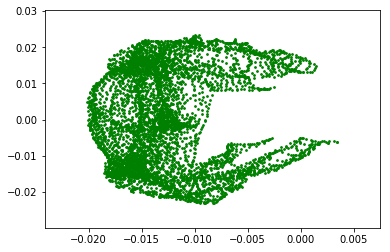

In [11]:
def plotgraph(finalModel):
    plt.scatter(finalModel[:,0], finalModel[:,1],c="green", s=3, )
    plt.show()
